# Lab 8 (19-03-2024)

### Tasks 
1. To build K-means cluster from scratch (without inbuilt packages)
2. To build PCA (Principle Components Analysis) from scratch
3. Use the PCA created in predicting/processing image data


In [68]:
Registration_Number = "22011103048"
Name = "Roahith R"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Roahith R and my roll no : 22011103048
Computer IP Address is: 192.168.65.61


## (1) KMeans Cluster

**Objective :** To minimize the sum of distances between the points and their respective cluster centroids.

Step 1: Choose the number of clusters k

Step 2: Select k random points from the data as centroids

Step 3: Assign all the points to the closest cluster centroid

Step 4: Recompute the centroids of newly formed clusters

Step 5: Repeat steps 3 and 4



In [69]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [70]:
# Dataset
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [71]:


def find_optimal_num_clusters(X, max_clusters=10):
    wcss = []  # Within-Cluster Sum of Squares

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  # Inertia is another name for WCSS

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

    return wcss

def initialize_random_centroids(X, num_clusters):
    num_examples, num_features = X.shape
    centroids = np.zeros((num_clusters, num_features))
    for k in range(num_clusters):
        centroid = X[np.random.choice(range(num_examples))]
        centroids[k] = centroid
    return centroids

def create_clusters(X, centroids):
    num_clusters = centroids.shape[0]
    clusters = [[] for _ in range(num_clusters)]
    for point_idx, point in enumerate(X):
        closest_centroid = np.argmin(np.sqrt(np.sum((point - centroids) ** 2, axis=1)))
        clusters[closest_centroid].append(point_idx)
    return clusters

def calculate_new_centroids(clusters, X):
    num_clusters, num_features = len(clusters), X.shape[1]
    centroids = np.zeros((num_clusters, num_features))
    for idx, cluster_points in enumerate(clusters):
        new_centroid = np.mean(X[cluster_points], axis=0)
        centroids[idx] = new_centroid
    return centroids

def predict_clusters(clusters, X):
    num_examples = X.shape[0]
    y_pred = np.zeros(num_examples)
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_pred[sample_idx] = cluster_idx
    return y_pred

def plot_clusters(X, y, centroids):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='*', label='Final Centroids')
    plt.title('Clustered Data with Final Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.grid(True)
    plt.show()

def kmeans_clustering(X, num_clusters, max_iterations=100, plot_figure=True):
    centroids = initialize_random_centroids(X, num_clusters)
    for _ in range(max_iterations):
        clusters = create_clusters(X, centroids)
        previous_centroids = centroids
        centroids = calculate_new_centroids(clusters, X)
        diff = centroids - previous_centroids
        if not diff.any():
            break
    y_pred = predict_clusters(clusters, X)
    if plot_figure:
        plot_clusters(X, y_pred, centroids)
    return y_pred



c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

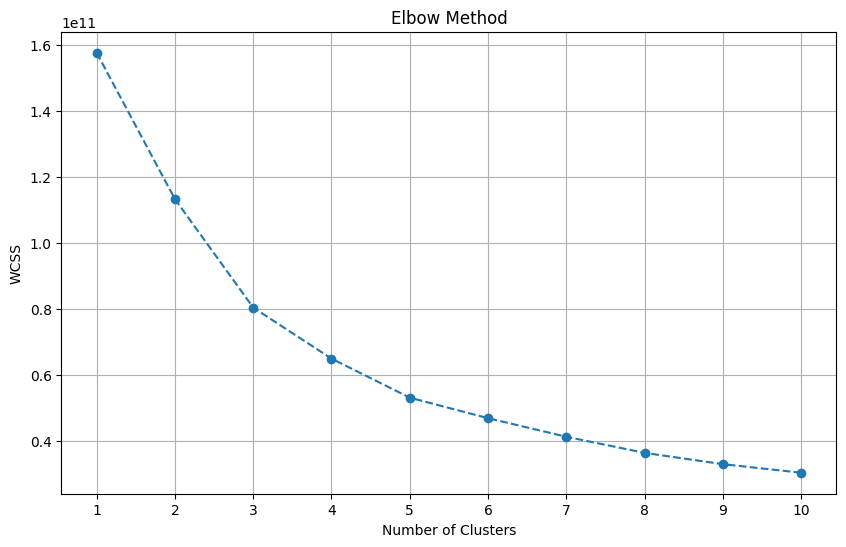

In [72]:

X = df.drop(['Channel', 'Region'], axis=1).values

    
# Find optimal number of clusters using elbow method
wcss = find_optimal_num_clusters(X)
    


From the Grapgh (Elbow Method), we conclude the number of clusters is **5**

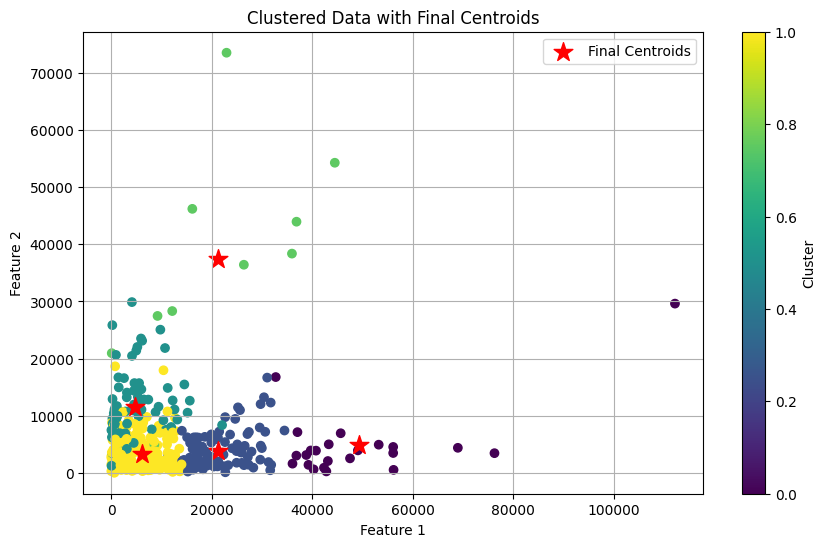

In [73]:
optimal_num_clusters = 5
    
# Perform clustering with the optimal number of clusters
y_pred = kmeans_clustering(X, optimal_num_clusters)

### KMeans clustering of Iris dataset

In [74]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data = data['data'], columns = data.feature_names)
df['Target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

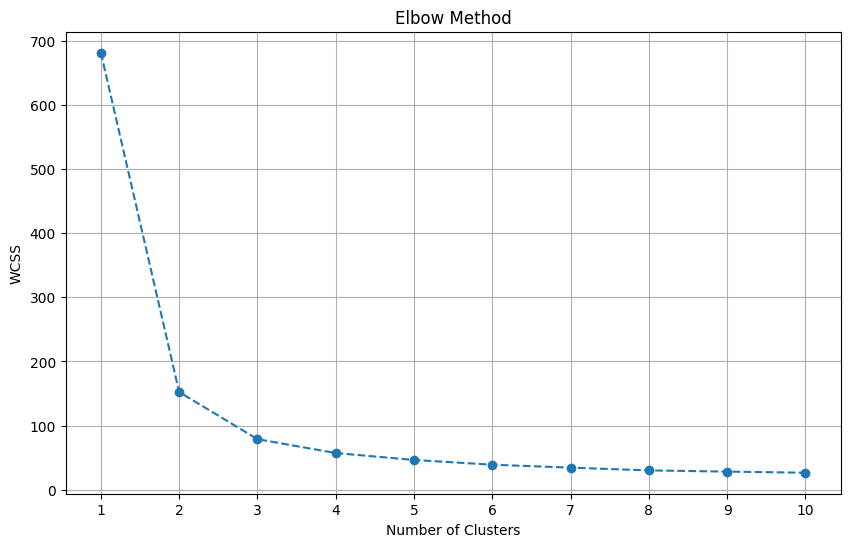

In [75]:
# Finding optimal number of clusters
X = df.drop('Target', axis=1)  # Features
wcss = find_optimal_num_clusters(X)


From the Graph (Elbow Method), we conclude the umber of clusters **3**

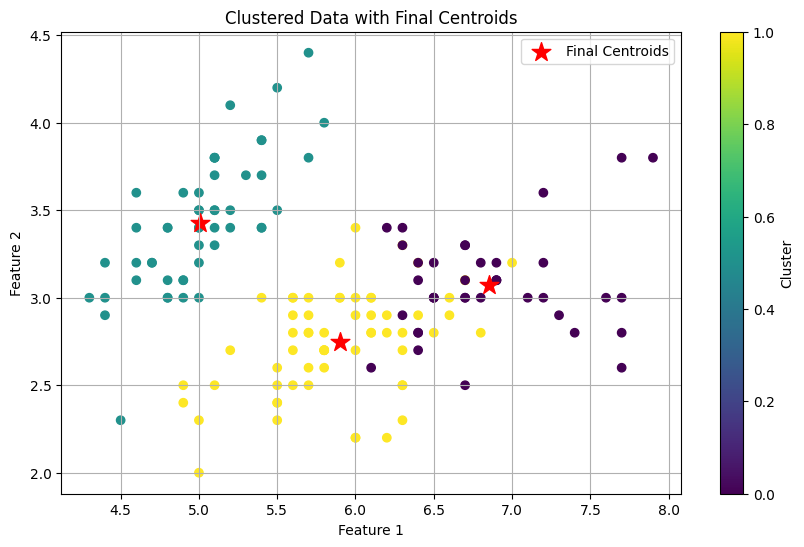

In [76]:
# Based on the elbow method plot, choose the optimal number of clusters
optimal_num_clusters = 3
    
# Perform K-means clustering with the optimal number of clusters
y_pred = kmeans_clustering(X.values, optimal_num_clusters)


## (2) Prinicipal Component Analysis (PCA)

- It is Unsupervised dimensionality reduction technique used for selecting best feature among lots lots of features

**Main Goal** : Reducing the number of variables in a data collection while retaining as much information as feasible. 

**The steps involved for PCA**
1. Normalize the original data (mean =0, variance =1)
2. Calculating covariance matrix
3. Calculating Eigen values, Eigen vectors, and normalized Eigenvectors
4. Calculating Principal Component (PC)
5. Plot the graph for orthogonality between Principal Components (PCs)

In [77]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [78]:
df = pd.read_csv('real_estate.csv')
df.head()

,Address,Rooms,Price,Bedroom2,Bathroom,Landsize,YearBuilt,Regionname,Suburb,Type
0,85 Turner St,2,1480000,2,1,202,NaN,Northern Metropolitan,Abbotsford,h
1,25 Bloomburg St,2,1035000,2,1,156,1900.0,Northern Metropolitan,Abbotsford,h
2,5 Charles St,3,1465000,3,2,134,1900.0,Northern Metropolitan,Abbotsford,h
3,40 Federation La,3,850000,3,2,94,NaN,Northern Metropolitan,Abbotsford,h
4,55a Park St,4,1600000,3,1,120,2014.0,Northern Metropolitan,Abbotsford,h


In [79]:
# Data Preprocessing 

le = LabelEncoder()
# We combine the Regionname and Suburb columns for approx. estimation of location
# Then we use LabelEncoder to convert the Location column to numerical data
df["Location"] = df["Regionname"] + " " + df["Suburb"]
df["Location"] = le.fit_transform(df["Location"])

# We also encode the house type column
df["Type"] = le.fit_transform(df["Type"])

# We drop the Address, Regionname and Suburb columns
df.drop(["Address","Regionname", "Suburb"], axis=1, inplace=True)


## To rank the year built column,as new house as top (expensive) (0-8)
def year_mapping(x):
    if x < 1800:
        return 8
    elif  1800 <= x <= 1850:
        return 7
    elif  1851 <= x <= 1900:
        return 6
    elif 1901 <= x <= 1920:
        return 5
    elif 1921 <= x <= 1950:
        return 4
    elif 1951 <= x <= 1980:
        return 3
    elif 1981 <= x <= 2000:
        return 2
    elif 2001 <= x <= 2023:
        return 1
    else :
        return 0

# To change Year built column to categorical data
df["YearBuilt"] = df["YearBuilt"].apply(year_mapping).fillna(0)


# Landsize : Used MinMax Scaler, Landsize is scaled from 0 to 1
min_max_scaler = MinMaxScaler()
df["Landsize"] = min_max_scaler.fit_transform(df[["Landsize"]])
df.head()

,Rooms,Price,Bedroom2,Bathroom,Landsize,YearBuilt,Type,Location
0,2,1480000,2,1,0.000466,0,0,70
1,2,1035000,2,1,0.000360,6,0,70
2,3,1465000,3,2,0.000309,6,0,70
3,3,850000,3,2,0.000217,0,0,70
4,4,1600000,3,1,0.000277,1,0,70


In [80]:
# Manually implemenation Of PCA

class PCA:
 
    def __init__(self,number_of_important_features=2):
        # number of specified features
        # Default being passed as 2
        self.number_of_important_features=number_of_important_features
        # Best possible features
        self.features=None
        self._mean=None
        
        
    def fit(self,X):
        # placing mean to as origin of axis
        # axis =0 is mean of rows along the column direction 
        self._mean=np.mean(X,axis=0)
        X=X-self._mean
        
        # Co-variance of N,D -->DxD
        # Also called Autocorrelation as both are X's
        covariance=np.dot(X.T,X)/(X.shape[0]-1)
        print(covariance.shape)



        eigenvalues,eigenvector=np.linalg.eig(covariance)
        print("eigenvalues-->",eigenvalues.shape)
        print("eigenvalues \n",eigenvalues)
        print("eigenvector-->",eigenvector.shape)
        print("eigenvector \n",eigenvector)
        #sort the eigenvalues from highest to lowest
        # If we didnt transpose, then applying indexs will require more steps and computation
        eigenvector=eigenvector.T
        print("eigenvector.T-->",eigenvector.shape)
        print("eigenvector after Transpose\n",eigenvector)
        indexs=np.argsort(eigenvalues)[::-1]
        #taking those indices and storing in eigenvalues and eigenvectors accordingly
        eigenvector=eigenvector[indexs]
        print("eigenvector-indexs-->",eigenvector.shape)
        print("eigenvector after indexes \n",eigenvector)
        eigenvalues=eigenvalues[indexs]
        print("eigenvalues-indexs-->",eigenvalues.shape)
        print("eigenvalues \n",eigenvalues)
        
        ## This below code snippet is for seeing how to determine which feature to be calculated
        total = sum(eigenvalues)
        variance_of_each_feature = [(i / total)*100 for i in eigenvalues]
        print("variance of each feature-->",variance_of_each_feature)
        
        # Now taking only number of specified componenets
        self.features=eigenvector[:self.number_of_important_features]
        print("self.features",self.features.shape)
        # So, now the we have chosen most significant features componenet
        
    def apply(self,X):
        # Here we project the data onto Principal component line
        X=X-self._mean
        # Check the dimensionality with (.shape) to confirm for yourselves
        # Here X-->(N,4);self.features-->2,4
        # (X,self.features.T)-->(N,4)x(4,2)==(N,2) i.e N samples with 2 feature vector 
        return np.dot(X,self.features.T)

In [81]:
# Applying PCA to the real estate data

pca=PCA(8)
pca.fit(df)

(8, 8)
eigenvalues--> (8,)
eigenvalues 
 [4.08718202e+11 6.97550876e+03 3.49784687e+00 1.58987135e+00
 4.68407057e-01 2.29130285e-01 5.09483599e-02 8.47039800e-05]
eigenvector--> (8, 8)
eigenvector 
 [[-7.42450571e-07  5.67355549e-04  3.81591755e-02 -6.30895530e-01
   1.26467187e-01 -2.45388931e-01 -7.24088876e-01  8.95260534e-05]
 [-1.00000000e+00  3.38598130e-06  3.26343334e-07  1.27282483e-06
   8.22667867e-09 -2.39041330e-07  1.86490690e-08 -4.48585598e-10]
 [-7.19104356e-07  6.36519038e-04  4.08700103e-02 -6.43293911e-01
   1.54419178e-01 -2.93187570e-01  6.88983270e-01 -2.28960676e-05]
 [-5.05318891e-07  4.13361034e-05  4.30636415e-02 -2.52512270e-01
   4.67001508e-01  8.46168188e-01  1.70865610e-02 -3.35862639e-04]
 [-5.40691256e-10  1.72122479e-06  1.29197855e-04 -5.27267535e-05
   1.03524695e-04  3.15709990e-04  8.74794827e-05  9.99999931e-01]
 [-4.01612868e-07 -3.85583452e-04 -9.97429459e-01 -5.70777862e-02
   4.20094001e-02  1.05247202e-02  9.37712360e-04  1.18103092e-04]
 [

### Result
From the results of the PCA, we observe the varaiance of the features are

| Rooms       | Price           | Bedroom2       | Bathroom       | Landsize       | YearBuilt      | Type           | Location       |
|-------------|-----------------|----------------|----------------|----------------|----------------|----------------|----------------|
| 99.9999     | 1.7067e-06      | 8.5581e-10     | 3.8899e-10     | 1.1460e-10     | 5.6061e-11     | 1.2465e-11     | 2.0724e-14     |

Thus we avoid using the features with least variance

## (3) Using PCA in image data

We apply PCA in compressing the image data


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

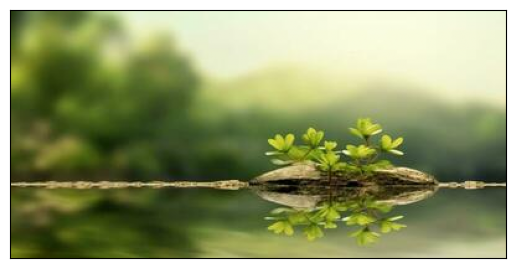

In [83]:
# Load image data
img = plt.imread("Input_Image.jpg")
img = img.astype(np.uint8)
img = img / 255 # divide all data by 255 to scale between 0 and 1
plt.imshow(img)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False) 

In [84]:
img_r = img[:,:,0]
img_g= img[:,:,1]
img_b = img[:,:,2]
print("Original picture shape", img.shape)
print("Red channel shape", img_r.shape)
print("Green channel shape", img_g.shape)
print("Blue channel shape", img_b.shape)

Original picture shape (200, 400, 3)
Red channel shape (200, 400)
Green channel shape (200, 400)
Blue channel shape (200, 400)


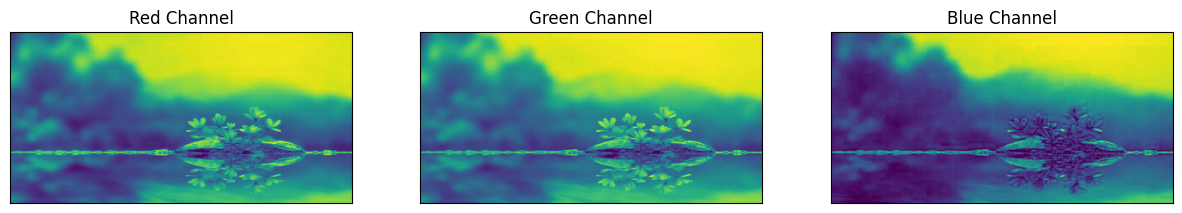

In [85]:
# Plotting the images
fig = plt.figure(figsize=(15, 7.2))
titles = ["Red Channel", "Green Channel", "Blue Channel"]
channels = [img_r, img_g, img_b]

for i in range(3):
    fig.add_subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.imshow(channels[i], cmap='viridis')
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)



In [86]:
img_r_df = pd.DataFrame(data = img_r)
img_r_df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.125490,0.137255,0.152941,0.164706,0.176471,0.192157,0.211765,0.223529,0.247059,0.266667,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.929412,0.929412,0.925490,0.925490,0.925490
1,0.125490,0.137255,0.149020,0.164706,0.172549,0.192157,0.211765,0.223529,0.247059,0.266667,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.929412,0.929412,0.925490,0.925490,0.925490
2,0.125490,0.137255,0.149020,0.160784,0.172549,0.192157,0.211765,0.223529,0.247059,0.266667,...,0.937255,0.937255,0.937255,0.937255,0.937255,0.933333,0.933333,0.929412,0.929412,0.929412
3,0.125490,0.137255,0.152941,0.164706,0.176471,0.192157,0.211765,0.227451,0.250980,0.270588,...,0.937255,0.937255,0.937255,0.937255,0.937255,0.933333,0.933333,0.929412,0.929412,0.929412
4,0.141176,0.149020,0.164706,0.176471,0.188235,0.203922,0.223529,0.239216,0.266667,0.286275,...,0.937255,0.937255,0.937255,0.937255,0.937255,0.933333,0.933333,0.929412,0.929412,0.929412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.474510,0.466667,0.458824,0.450980,0.447059,0.439216,0.423529,0.411765,0.419608,0.407843,...,0.819608,0.819608,0.815686,0.815686,0.815686,0.815686,0.815686,0.815686,0.815686,0.815686
196,0.462745,0.454902,0.447059,0.439216,0.435294,0.427451,0.411765,0.400000,0.396078,0.384314,...,0.823529,0.823529,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608
197,0.427451,0.419608,0.415686,0.415686,0.415686,0.407843,0.400000,0.388235,0.376471,0.364706,...,0.823529,0.823529,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608
198,0.423529,0.415686,0.411765,0.407843,0.403922,0.400000,0.384314,0.376471,0.372549,0.360784,...,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608,0.819608


In [87]:
pca_components=20 # number of dimensions to retain
# red channel
pca_r = PCA(n_components=pca_components)
trans_pca_r = pca_r.fit_transform(img_r)
#
# green channel
pca_g = PCA(n_components=pca_components)
trans_pca_g = pca_g.fit_transform(img_g)
#
# blue channel
pca_b = PCA(n_components=pca_components)
trans_pca_b = pca_b.fit_transform(img_b)
# check reduction
print("Check dimensionality reduction")
print("Red channel size before reduction: ", img_r.nbytes)
print("Red channel size after reduction: ", trans_pca_r.nbytes)
#
# check variance retained
print("\nCheck variance retained")
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Check dimensionality reduction
Red channel size before reduction:  640000
Red channel size after reduction:  32000

Check variance retained
Blue Channel : 0.9910040701763533
Green Channel: 0.9894234877776671
Red Channel  : 0.9900978999818306


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


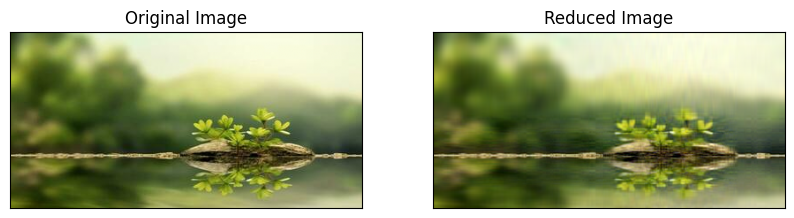

In [88]:
# Now we reconstruct the compressed image

b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
img_reduced = np.dstack((r_arr,g_arr,b_arr))

fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False) 
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False) 
plt.show()